In [2]:
# importing librarires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style setttings for seaborn and matplotlib
sns.set(style = "whitegrid", palette = "muted", font_scale = 1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# uploading full data table after etl
full_data = pd.read_csv (r"C:\Users\user\Desktop\NaturalCosmeticsShopproject\tables\full_data_clean.csv")

In [3]:
# overview
full_data.info()
full_data.head()
full_data.isna().sum()
full_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           5000 non-null   int64  
 1   sale_date         5000 non-null   object 
 2   quantity          5000 non-null   int64  
 3   discount_applied  5000 non-null   object 
 4   payment_method    5000 non-null   object 
 5   discount_percent  5000 non-null   float64
 6   product_name      5000 non-null   object 
 7   brand_name        5000 non-null   object 
 8   category          5000 non-null   object 
 9   price             5000 non-null   float64
 10  customer_name     5000 non-null   object 
 11  city              5000 non-null   object 
 12  gender            5000 non-null   object 
 13  total_revenue     5000 non-null   float64
 14  gross_revenue     5000 non-null   float64
 15  discount_value    5000 non-null   float64
dtypes: float64(5), int64(2), object(9)
memory 

,sale_id,quantity,discount_percent,price,total_revenue,gross_revenue,discount_value
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2.012000,0.008562,32.988606,66.545024,67.093888,0.548872
std,1443.520003,0.815346,0.022256,33.756119,81.411133,81.890963,2.183371
min,1.000000,1.000000,0.000000,6.230000,5.920000,6.230000,0.000000
25%,1250.750000,1.000000,0.000000,20.700000,29.600000,29.740000,0.000000
50%,2500.500000,2.000000,0.000000,26.630000,47.800000,47.980000,0.000000
75%,3750.250000,3.000000,0.000000,34.950000,79.320000,79.890000,0.000000
max,5000.000000,3.000000,0.100000,240.000000,720.000000,720.000000,59.050000


In [4]:
full_data['sale_date'] = pd.to_datetime(full_data['sale_date'])

In [5]:
full_data['month'] = full_data['sale_date'].dt.to_period('M')

In [6]:
print("Total Revenue:", full_data['total_revenue'].sum())
print("Total Orders:", full_data.shape[0])
print("Average Check:", full_data['total_revenue'].mean())

Total Revenue: 332725.12
Total Orders: 5000
Average Check: 66.545024


In [7]:
full_data.dtypes

sale_id                      int64
sale_date           datetime64[ns]
quantity                     int64
discount_applied            object
payment_method              object
discount_percent           float64
product_name                object
brand_name                  object
category                    object
price                      float64
customer_name               object
city                        object
gender                      object
total_revenue              float64
gross_revenue              float64
discount_value             float64
month                    period[M]
dtype: object

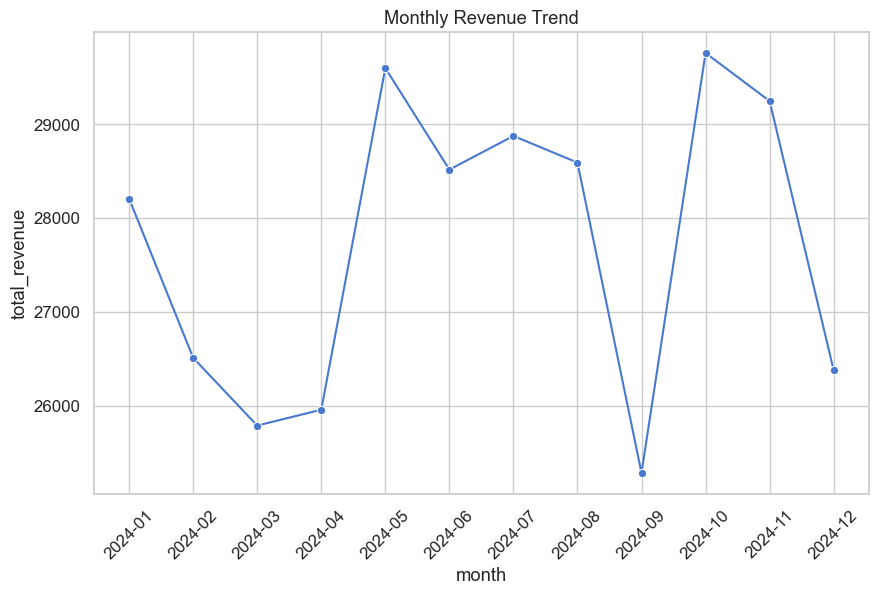

In [8]:
monthly_revenue = (
    full_data.groupby('month')['total_revenue'].sum().reset_index()
)

# converting 'month' to string for seaborn
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

sns.lineplot(data = monthly_revenue, x = 'month', y = 'total_revenue', marker = 'o')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation = 45)
plt.show()

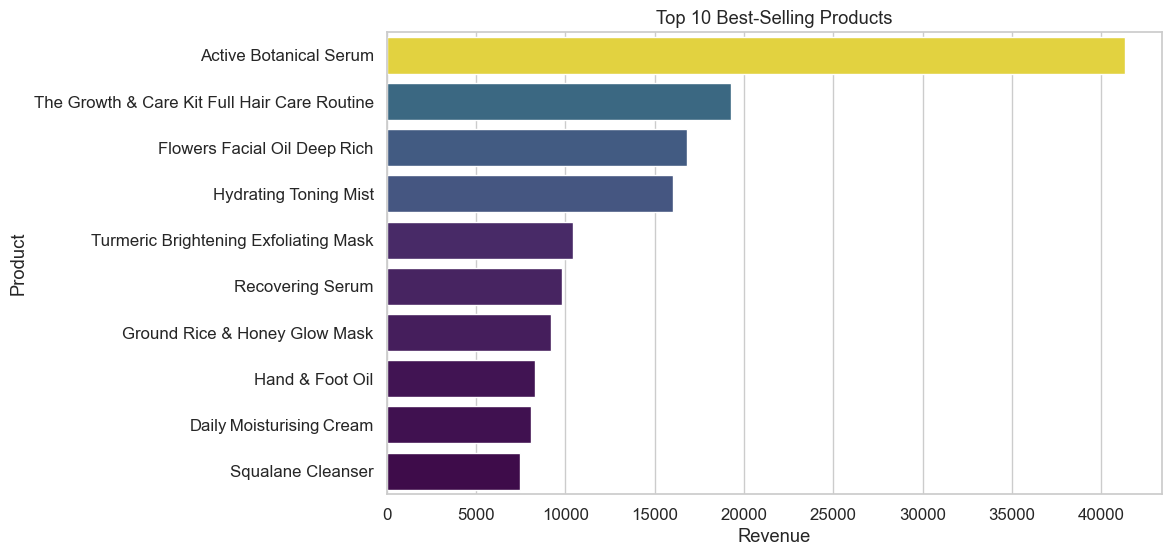

In [9]:
top_products = (
full_data.groupby('product_name')['total_revenue']
.sum()
.sort_values(ascending  = False)
.head(10)
)
sns.barplot(x = top_products.values, y = top_products.index,hue = top_products.values, palette = "viridis", legend = False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

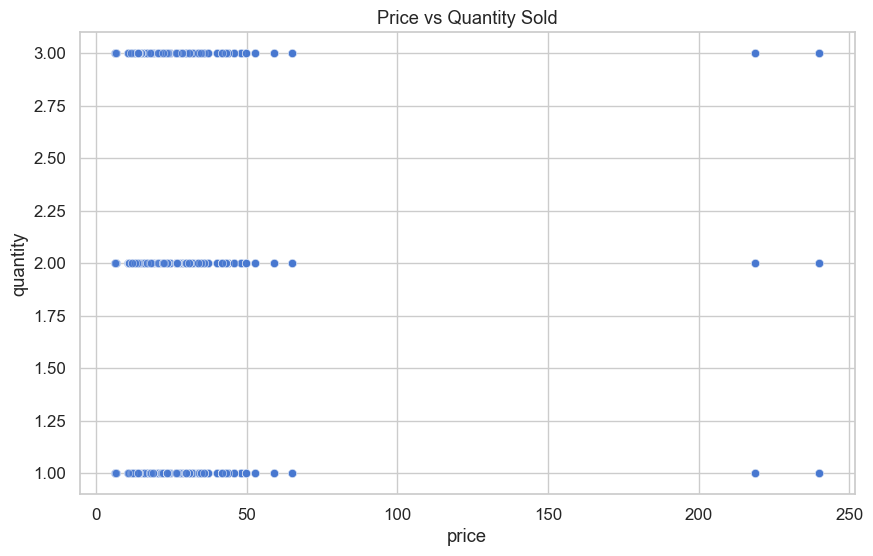

In [10]:
sns.scatterplot(data = full_data, x = 'price', y = 'quantity', alpha = 0.6)
plt.title("Price vs Quantity Sold")
plt.show()

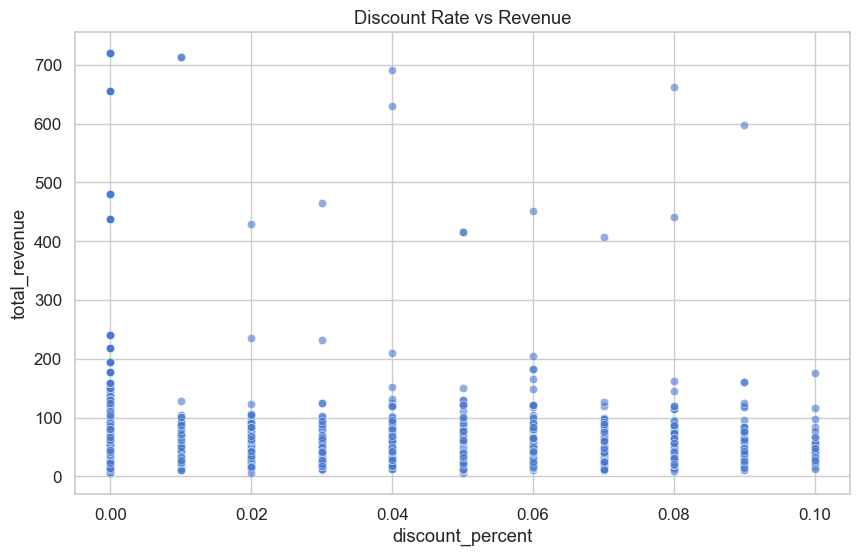

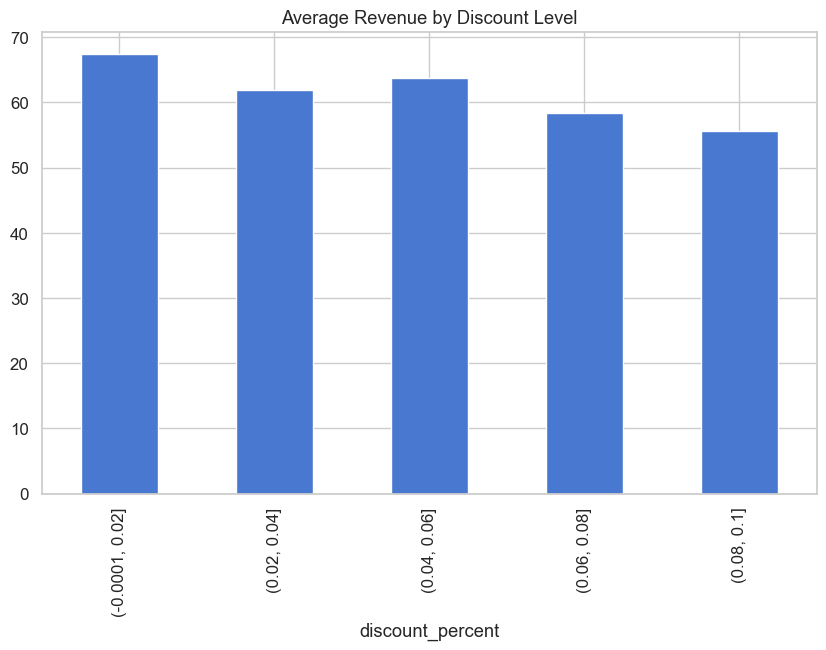

In [11]:
sns.scatterplot(data = full_data, x = 'discount_percent', y = 'total_revenue', alpha = 0.6)
plt.title("Discount Rate vs Revenue")
plt.show() 

avg_revenue_discount = full_data.groupby(pd.cut(full_data['discount_percent'], bins = 5), observed = True)['total_revenue'].mean()
avg_revenue_discount.plot(kind = 'bar')
plt.title("Average Revenue by Discount Level")
plt.show()

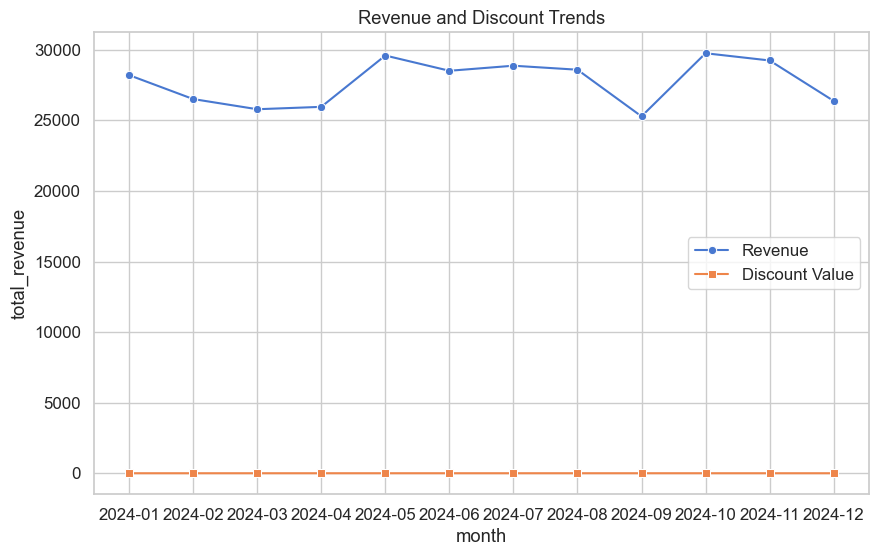

In [14]:
monthly_avg_discount = full_data.groupby('month')['discount_value'].mean().reset_index()
monthly_avg_discount['total_revenue'] = monthly_revenue['total_revenue']
# converting 'monthly_avg_discount' to string for seaborn 
monthly_avg_discount['month'] = monthly_avg_discount['month'].astype(str)
sns.lineplot(data=monthly_avg_discount, x='month', y='total_revenue', label='Revenue', marker='o')
sns.lineplot(data=monthly_avg_discount, x='month', y='discount_value', label='Discount Value', marker='s')
plt.title("Revenue and Discount Trends")
plt.legend()
plt.show()

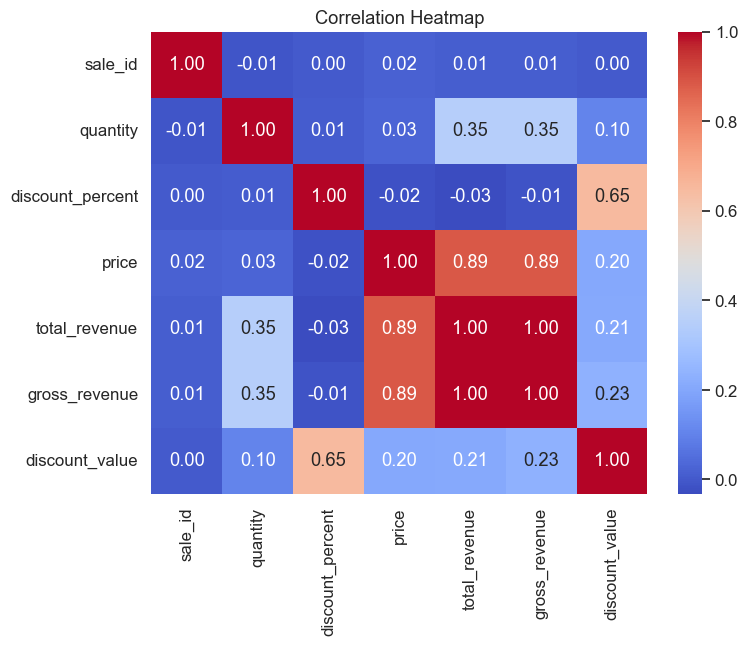

In [23]:
# Select numeric features
numeric_cols = full_data.select_dtypes(include=np.number)

# Compute correlation
corr = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


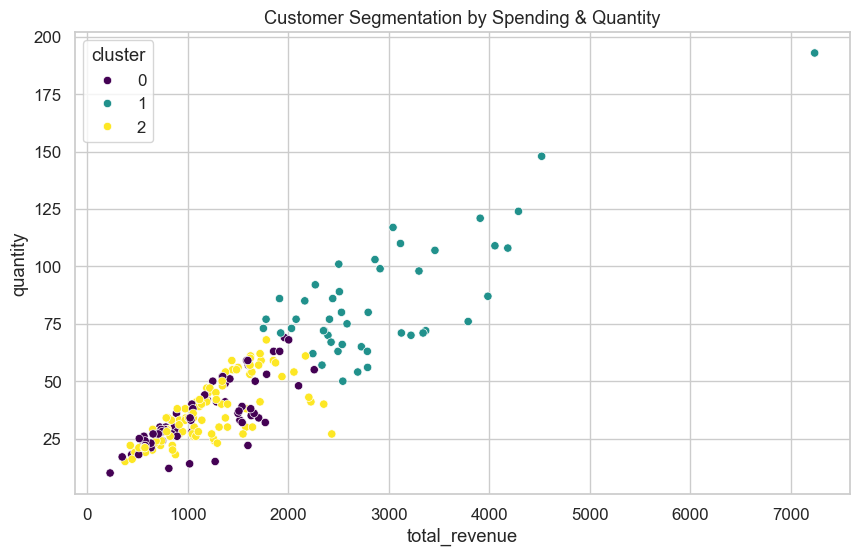

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare customer-level dataset
customers = full_data.groupby('customer_name').agg({
    'total_revenue': 'sum',
    'quantity': 'sum',
    'discount_percent': 'mean'
}).reset_index()

# Normalize data
scaler = StandardScaler()
scaled = scaler.fit_transform(customers[['total_revenue', 'quantity', 'discount_percent']])

# K-Means clustering (3 segments)
kmeans = KMeans(n_clusters=3, random_state = 42)
customers['cluster'] = kmeans.fit_predict(scaled)

# Visualize clusters
sns.scatterplot(
    data = customers,
    x = 'total_revenue', y = 'quantity',
    hue = 'cluster', palette = 'viridis'
)
plt.title("Customer Segmentation by Spending & Quantity")
plt.show()

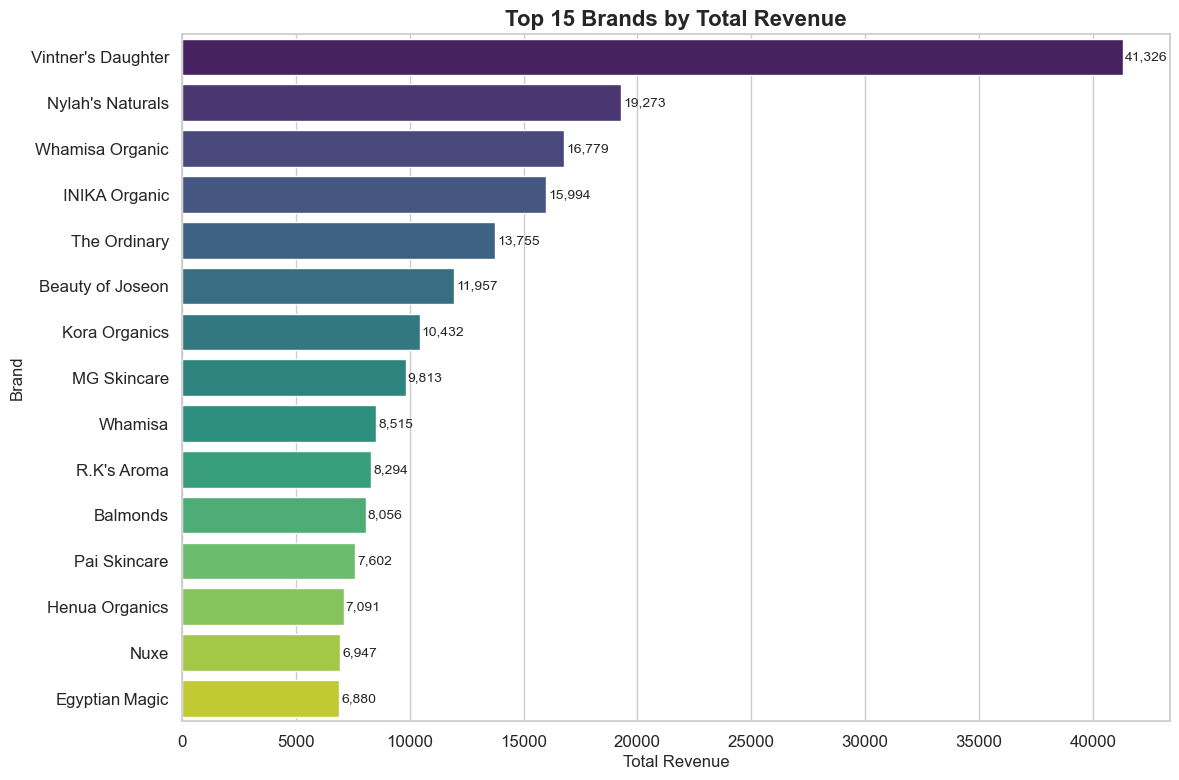

In [13]:
if 'brand_name' in full_data.columns:
    brand_rev = full_data.groupby('brand_name')['total_revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
brand_rev = full_data.groupby('brand_name')['total_revenue'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=brand_rev.values, y=brand_rev.index, hue = brand_rev.index, palette="viridis", legend=False)
plt.title("Top 15 Brands by Total Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Brand", fontsize=12)
for i, v in enumerate(brand_rev.values):
    plt.text(v + 100, i, f"{v:,.0f}", va='center', fontsize=10)
plt.tight_layout()
plt.show() 

In [14]:
customers.to_csv("customers_clusters.csv", index=False)